In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import set_config
set_config(display="diagram")
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from warnings import filterwarnings 
filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

# Business Understanding of Problem

A used car dataset (~426,000 rows of data) was obtained from kaggle to study and understand how an used car price is determined by different features and records. My goal is to study, analyze and develop predictive models that can forecast the car pricing. This can help our clients (e.g., car dealership, automaker and private seller) to understand the value of an used car and the price to be more or less expensive.


# Objective

1. Understand the relationship between different features.
2. Clean up the dataset, perform feature engineering and transformation (if necessary).
3. Build multiple regression models to predict car pricing.
4. Evaluate and create visuals to analysis models accuracies. 
5. Provide actionable insights based on model findings. 

In [2]:
cars = pd.read_csv('~/Downloads/practical_application_II/data/vehicles.csv')

In [4]:
#Take a look of 5 random samples in this dataset.
cars.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
359774,7314299737,nashville,2000,2007.0,kia,sorento,NaN,NaN,gas,151873.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,tn
264374,7311623207,albany,14500,2013.0,bmw,535xi,excellent,6 cylinders,gas,81200.0,clean,automatic,NaN,4wd,full-size,sedan,brown,ny
357586,7311186719,memphis,21788,2013.0,ford,f-150,NaN,6 cylinders,gas,161258.0,clean,automatic,1FTFW1ET8DKE55951,4wd,NaN,NaN,white,tn
384412,7314817698,waco,31990,2018.0,ram,1500 quad cab harvest pickup,good,6 cylinders,gas,27426.0,clean,other,1C6RR7GG8JS247420,4wd,NaN,pickup,white,tx
63853,7316475180,stockton,0,2013.0,honda,accord ex-l v6,like new,6 cylinders,gas,117150.0,clean,automatic,1HGCT2B84DA007294,fwd,NaN,coupe,white,ca
327457,7308346440,salem,0,2018.0,chevrolet,cruze,NaN,4 cylinders,gas,58997.0,clean,automatic,1G1BE5SM0J7139814,fwd,NaN,sedan,NaN,or
42620,7314905408,orange county,11995,2016.0,chevrolet,cruze limited,NaN,4 cylinders,gas,85937.0,clean,automatic,1G1PE5SB7G7159247,fwd,NaN,sedan,white,ca
21315,7315894216,bakersfield,24990,2019.0,acura,ilx premium pkg sedan 4d,good,NaN,other,5334.0,clean,other,19UDE2F79KA014450,fwd,NaN,sedan,NaN,ca
165550,7314079770,"kansas city, MO",14900,2014.0,ford,e-350,NaN,NaN,gas,164710.0,clean,automatic,NaN,NaN,NaN,bus,white,ks
407801,7316904258,seattle-tacoma,29500,2005.0,ram,diesels cummins 3500,excellent,6 cylinders,diesel,100000.0,clean,automatic,NaN,4wd,full-size,truck,purple,wa


# Data

The cars dataset contains 18 baseline variables, except ID, pricing, year of made, and the odometer, all other
variables are categorical that need to be cleaned before conducting the machine learning modeling. 

1. id

2. region: Where the car is located or registered within the City and/or County.

3. price: target variable

4. year: year of made

5. manufacturer: Car maker or brand name (e.g., Toyota, BMW, Tesla, etc)

6. model: Car model (e.g., Toyota Camry, BMW X3, Tesla Model Y, etc)

7. condition: Car condition (e.g., excellent, like new, etc)

8. cylinders: Cylinders in a car engine refer to the chambers where fuel combustion occurs to compressed the air and ignited by a spark plug. The resulting explosion drives the piston down, then turns the crankshaft and powers the vehicle to run.

9. fuel: Type of resources to use by a car (e.g., gas or diesel)

10. odometer: A meter to record how many miles a car had run

11. title status: Accident records of a car history

12. transmission: System that transmits power from the engine to the wheels, allowing the vehicle to change speeds and move efficiently. (e.g., auto vs. manual)

13. VIN: stands for Vehicle Identification Number

14. drive: Refers to the system that delivers power from the engine to the wheels, determining which wheels are powered and handles in different driving conditions

15. size: Overall dimensions and number of doors of a car

16. type: Overall the design category of the car, which typically indicates its seating capacity, cargo space, and intended use

17. paint color: Paint color of a car

18. state:  Where the car is located or registered within the State

# Exploratory Data Analysis (EDA)

In [47]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133946 entries, 31 to 426878
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         133946 non-null  int64  
 1   year          133946 non-null  float64
 2   condition     133946 non-null  object 
 3   cylinders     133946 non-null  object 
 4   fuel          133946 non-null  object 
 5   odometer      133946 non-null  float64
 6   title_status  133946 non-null  object 
 7   transmission  133946 non-null  object 
 8   drive         133946 non-null  object 
 9   type          133946 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.2+ MB


In [5]:
#Data Exploration for unique values in this dataset.
cars.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

# Data Cleaning

In [6]:
#Discarded certain columns (id, region, manufacturer, model, VIN, size and state) that are considered not 
#useful for analysis

cols_to_use = ['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
               'transmission', 'drive', 'type']
cars = cars[cols_to_use]
cars.sample(10)

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
347667,5900,2005.0,excellent,6 cylinders,gas,149000.0,NaN,automatic,NaN,SUV
206178,35590,2011.0,good,8 cylinders,gas,16796.0,clean,other,rwd,coupe
91533,19000,2015.0,NaN,NaN,gas,117581.0,clean,automatic,4wd,SUV
317881,740,2020.0,NaN,6 cylinders,other,11643.0,clean,automatic,NaN,NaN
157492,1900,2004.0,good,4 cylinders,gas,150000.0,clean,automatic,fwd,sedan
108407,17997,2006.0,NaN,8 cylinders,diesel,201006.0,clean,automatic,4wd,truck
106433,25590,2015.0,good,6 cylinders,other,35290.0,clean,other,NaN,pickup
232501,16590,2010.0,good,NaN,gas,83005.0,clean,other,4wd,other
59890,26590,2014.0,good,6 cylinders,gas,45318.0,clean,other,rwd,sedan
162449,12495,NaN,NaN,4 cylinders,gas,6948.0,NaN,automatic,fwd,SUV


In [7]:
cars.shape

(426880, 10)

In [8]:
cars.isna().sum()

price                0
year              1205
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
dtype: int64

In [9]:
cars.dropna(inplace=True)

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133946 entries, 31 to 426878
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         133946 non-null  int64  
 1   year          133946 non-null  float64
 2   condition     133946 non-null  object 
 3   cylinders     133946 non-null  object 
 4   fuel          133946 non-null  object 
 5   odometer      133946 non-null  float64
 6   title_status  133946 non-null  object 
 7   transmission  133946 non-null  object 
 8   drive         133946 non-null  object 
 9   type          133946 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.2+ MB


In [11]:
#After conducting an online research, I apply filters for 'odometer' between 1,000 and 250,000 miles, 
#the manufactured year after 2000 and 'price' to be at least $1000 or more 

filtered_cars = cars[(cars['odometer'] >= 1000) & (cars['odometer'] < 250000) 
                     & (cars['year'] > 1999) & (cars['price'] > 1000)]

In [12]:
unique_counts = filtered_cars.nunique()
print(unique_counts)

price            5280
year               23
condition           6
cylinders           8
fuel                5
odometer        36444
title_status        6
transmission        3
drive               3
type               13
dtype: int64


In [13]:
#Implement one-hot encoding to convert columns with categorical values before conducting machine learning models
cars_cleaned = pd.get_dummies(filtered_cars, drop_first=True)

In [14]:
cars_cleaned.sample(10)

,price,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
71287,12388,2011.0,106678.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
339002,39990,2019.0,8373.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
202504,8900,2010.0,93000.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
120776,8999,2011.0,120000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
217057,4000,2006.0,143000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
119530,15900,2014.0,63514.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
399042,32990,2017.0,96246.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414081,49990,2013.0,98689.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
262871,95000,2017.0,22000.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
18479,34988,2014.0,200000.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
#Understand the description for each column after implementing one-hot encoding
cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110872 entries, 31 to 426878
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    110872 non-null  int64  
 1   year                     110872 non-null  float64
 2   odometer                 110872 non-null  float64
 3   condition_fair           110872 non-null  uint8  
 4   condition_good           110872 non-null  uint8  
 5   condition_like new       110872 non-null  uint8  
 6   condition_new            110872 non-null  uint8  
 7   condition_salvage        110872 non-null  uint8  
 8   cylinders_12 cylinders   110872 non-null  uint8  
 9   cylinders_3 cylinders    110872 non-null  uint8  
 10  cylinders_4 cylinders    110872 non-null  uint8  
 11  cylinders_5 cylinders    110872 non-null  uint8  
 12  cylinders_6 cylinders    110872 non-null  uint8  
 13  cylinders_8 cylinders    110872 non-null  uint8  
 14  cyl

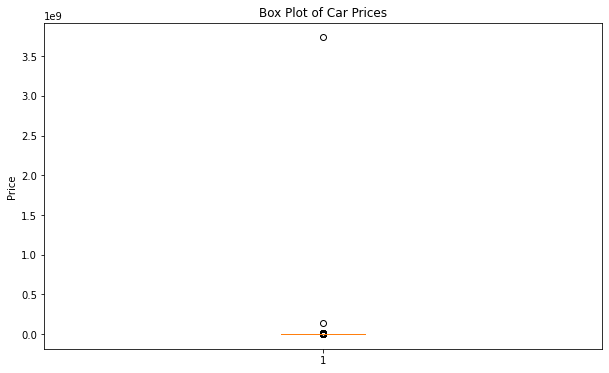

In [16]:
# Create a box plot to visualize the distribution of the 'pricing' column and found the outliers
plt.figure(figsize=(10, 6))
plt.boxplot(cars_cleaned['price'])
plt.title('Box Plot of Car Prices')
plt.ylabel('Price')
plt.show()

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = cars_cleaned['price'].quantile(0.10)
Q3 = cars_cleaned['price'].quantile(0.90)

print(Q1)
print(Q3)

4200.0
36500.0


In [18]:
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print(IQR)

32300.0


In [19]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
# Identify and remove outliers
cars_no_outliers = cars_cleaned[(cars_cleaned['price'] >= lower_bound) & (cars_cleaned['price'] <= upper_bound)]
print(f'Original dataset size: {cars_cleaned.shape[0]}')
print(f'Dataset size after removing outliers: {cars_no_outliers.shape[0]}')

Original dataset size: 110872
Dataset size after removing outliers: 110687


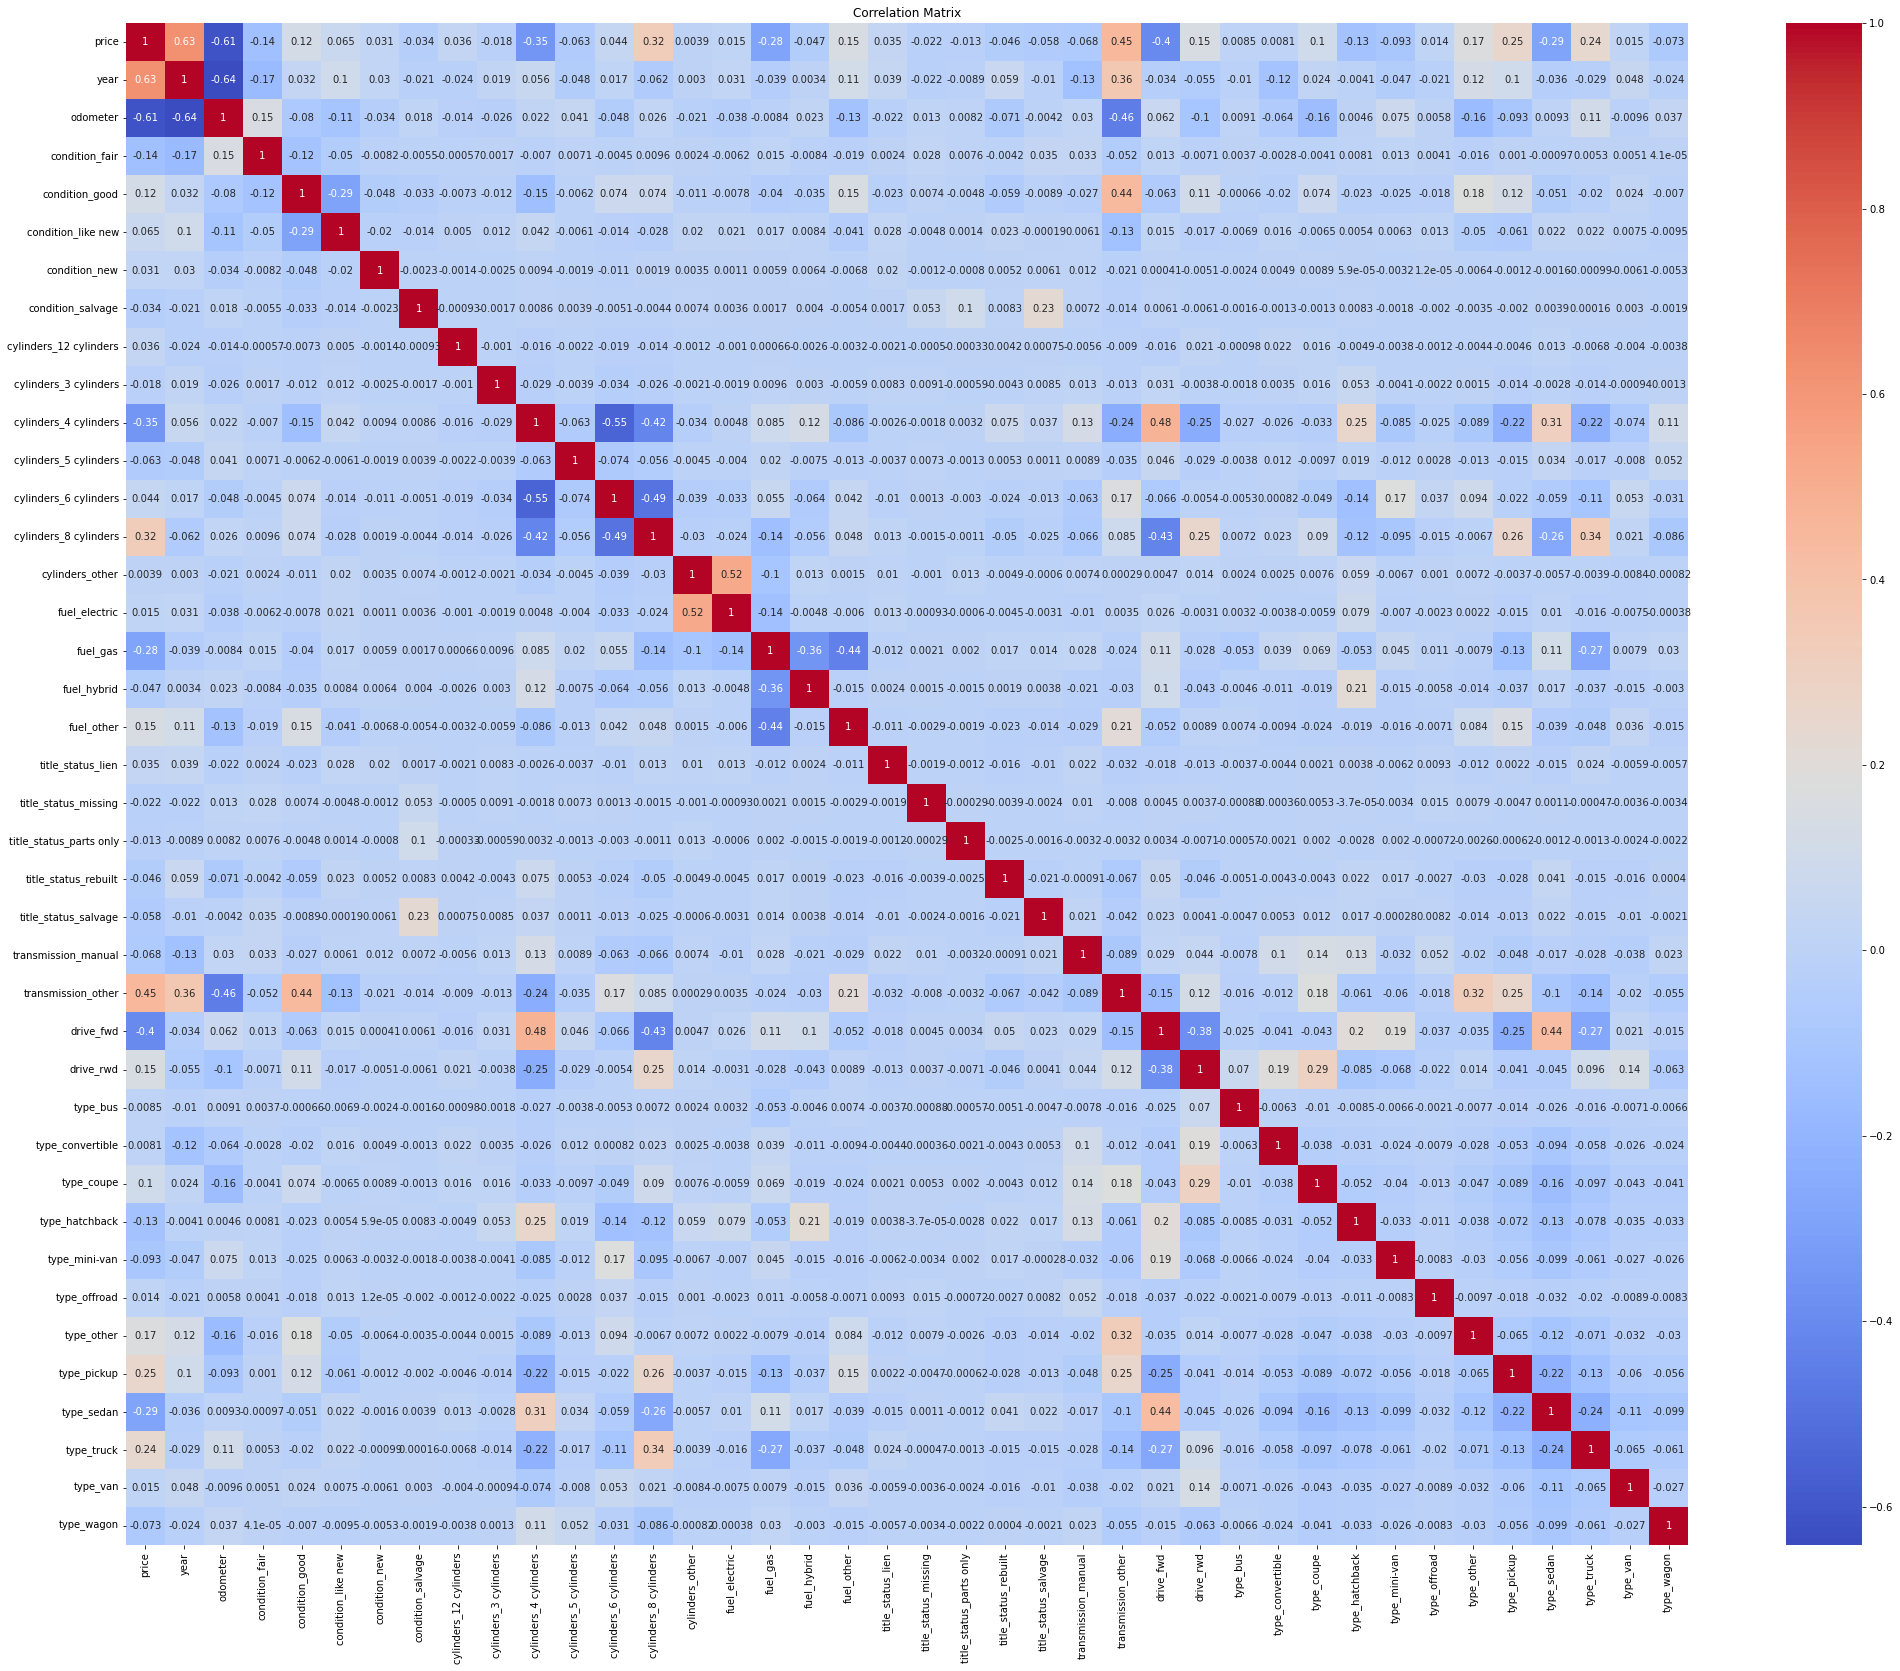

In [48]:
# Visualize correlations for variables
plt.figure(figsize=(35, 28))
sns.heatmap(cars_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Machine Learning Modeling - Multiple Regression

In [21]:
#Create X and y('price')
X = cars_no_outliers.drop('price', axis=1)
y = cars_no_outliers['price']

In [22]:
# Standardize the features to ensure that all features contribute equally to the model, which leads to more stable 
# coefficients and intercept

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
#Perform train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# Create and fit the linear regression model
model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.7641938650715113

In [25]:
model.score(X_train, y_train)

0.7667471027277002

In [26]:
# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 4443.208619306965
Root Mean Squared Error: 6340.697301494415


In [28]:
# Get the coefficients and intercept
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_
print("Linear Regression Coefficients:")
print(coefficients)
print("\nIntercept:", intercept)

Linear Regression Coefficients:
year                       5221.942827
odometer                  -4069.542763
condition_fair             -219.389853
condition_good             -151.096294
condition_like new          172.084101
condition_new               167.247962
condition_salvage           -99.219215
cylinders_12 cylinders      380.780907
cylinders_3 cylinders      -650.220961
cylinders_4 cylinders     -5223.766532
cylinders_5 cylinders      -862.086305
cylinders_6 cylinders     -3414.276849
cylinders_8 cylinders     -1381.141526
cylinders_other            -537.899078
fuel_electric              -385.030539
fuel_gas                  -3568.748296
fuel_hybrid               -1122.168986
fuel_other                -1465.016261
title_status_lien            12.900907
title_status_missing        -85.234597
title_status_parts only     -55.293207
title_status_rebuilt       -723.130197
title_status_salvage       -427.784324
transmission_manual         496.856546
transmission_other         1278.

In [ ]:
# Visualize correlations for variables
plt.figure(figsize=(35, 28))
sns.heatmap(cars_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [30]:
lasso_reg.score(X_test, y_test)

0.7626768594569874

In [31]:
lasso_reg.score(X_train, y_train)

0.7650303011882928

In [33]:
# Initialize different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
}

In [34]:
# Train and evaluate different models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae,'r2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, MAE = {mae:.4f}, r2 = {r2:.4f}")

Linear Regression: RMSE = 6340.6973, MAE = 4443.2086, r2 = 0.7642
Ridge Regression: RMSE = 6340.6955, MAE = 4443.1933, r2 = 0.7642
Lasso Regression: RMSE = 6340.6712, MAE = 4442.8846, r2 = 0.7642


In [35]:
#RMSE indicates the average error in the predictions. In this context, it means that on average, the model's 
#predictions are off by about 19383864 units from the acutal values of pricing predictions.
#MAE is the mean absolute error
#The R² score is a widely used metric for evaluating the performance of regression models. It indicates how well 
#the independent variables explain the variability of the dependent variable (target). An R² score of 1 means 
#the model perfectly explains the variability of the target, whereas an R² score of 0 means the model does 
#not explain any variability.

# Cross Validation and Hyperparameter Tuning

In [36]:
#Define the parameter grid for Ridge and Lasso
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0, 100.0]}
}

#Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
}


In [37]:
#Perform Cross-Validation and Hyperparameter Tuning
best_models = {}
for name, model in models.items():
    if name in param_grid: 
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

        
print()
print('Evaluate the best models on the test set')
results ={}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
    
# Optional: Display the results in a more readable format
results_df = pd.DataFrame(results).T
print(results_df)

Linear Regression: Cross-validation RMSE = 6262.6608
Ridge Regression: Cross-validation RMSE = 6262.6608
Lasso Regression: Cross-validation RMSE = 6262.6879

Evaluate the best models on the test set
Linear Regression: RMSE = 6340.6973, R2 = 0.7642
Ridge Regression: RMSE = 6340.6955, R2 = 0.7642
Lasso Regression: RMSE = 6340.6712, R2 = 0.7642
                          RMSE        R2
Linear Regression  6340.697301  0.764194
Ridge Regression   6340.695490  0.764194
Lasso Regression   6340.671192  0.764196


# Final performance metrics and model prediction with Ridge Regression

Summary: 

Ridge Regression performed better than Lasso Regression after GridSearchCV, although all three models have very close RMSE and R2 value. See result above. 

In [49]:
#Use the best model (comparing Ridge, Lasso and Linear Regression) to predict the car pricing
best_ridge_model = best_models['Ridge Regression']
y_pred = best_ridge_model.predict(X_test)

#To create a df to compare the actual data vs. predicted pricing
actual_vs_predicted_pricing = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_pricing.sample(10)

,Actual,Predicted
54797,5500,11539.038258
171007,16950,20404.108904
215505,8995,9003.711907
191141,3995,7086.527634
137837,8500,14075.174099
171170,39990,37623.778308
153798,29590,31922.646551
12986,1800,5963.546094
21300,36900,29057.149225
354437,13995,20211.850344


In [50]:
# Get the coefficients and the intercept from the best model
coefficients = pd.Series(best_ridge_model.coef_, index=X.columns)
intercept = best_ridge_model.intercept_

print("Ridge Regression Coefficients:")
print(coefficients)
print("\nIntercept:", intercept)

Ridge Regression Coefficients:
year                       5221.832352
odometer                  -4069.549178
condition_fair             -219.396733
condition_good             -151.078058
condition_like new          172.082959
condition_new               167.250905
condition_salvage           -99.222268
cylinders_12 cylinders      381.027559
cylinders_3 cylinders      -649.752217
cylinders_4 cylinders     -5218.706114
cylinders_5 cylinders      -861.100503
cylinders_6 cylinders     -3409.058564
cylinders_8 cylinders     -1376.451735
cylinders_other            -537.367858
fuel_electric              -385.001987
fuel_gas                  -3568.581210
fuel_hybrid               -1122.097404
fuel_other                -1464.917743
title_status_lien            12.905457
title_status_missing        -85.236575
title_status_parts only     -55.293828
title_status_rebuilt       -723.122218
title_status_salvage       -427.782703
transmission_manual         496.832811
transmission_other         1278.5

# Definition

1. Coefficient value: Value of coefficient represents the expected change in the target variable for a one-unit change in the corresponding feature, while assuming all other features remain constant. 

2. Intercept: Represents the expected value of the target variable when all features are zero. 

# Plot the results - Acutal vs. Predicted Car Pricing

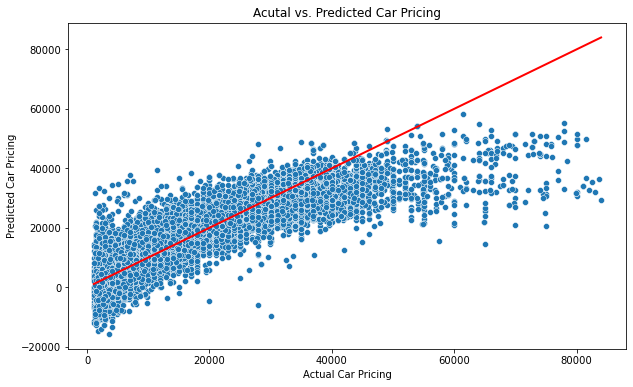

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_pricing)
plt.plot([actual_vs_predicted_pricing['Actual'].min(), actual_vs_predicted_pricing['Actual'].max()],
         [actual_vs_predicted_pricing['Actual'].min(), actual_vs_predicted_pricing['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Car Pricing')
plt.ylabel('Predicted Car Pricing')
plt.title('Acutal vs. Predicted Car Pricing')
plt.show()

# Try Random Forest model

In [41]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Predict and evaluate
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
print(f'Random Forest Mean Absolute Error: {rf_mae}')
print(f'Random Forest Root Mean Squared Error: {rf_rmse}')

Random Forest Mean Absolute Error: 2112.5283818200037
Random Forest Root Mean Squared Error: 4071.3750381202167


# Apply permutation feature importance as a strategy to inspect the model and its features importance.

In [43]:
from sklearn.inspection import permutation_importance

In [44]:
#Data split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, random_state=0)

#Train the model
model = Ridge(alpha=0.001).fit(X_train, y_train)
model.score(X_val, y_val)

0.7660981099875295

In [45]:
#Define the permutation importance object
r = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)

In [46]:
#Print the permutation importance results

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        
        print(f"{X.columns[i]:<20}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year                0.324 +/- 0.003
cylinders_4 cylinders0.315 +/- 0.004
odometer            0.197 +/- 0.002
fuel_gas            0.151 +/- 0.002
cylinders_6 cylinders0.131 +/- 0.002
drive_fwd           0.032 +/- 0.001
fuel_other          0.027 +/- 0.001
type_truck          0.022 +/- 0.001
cylinders_8 cylinders0.021 +/- 0.001
transmission_other  0.018 +/- 0.001
fuel_hybrid         0.016 +/- 0.001
cylinders_5 cylinders0.008 +/- 0.000
title_status_rebuilt0.006 +/- 0.000
cylinders_3 cylinders0.005 +/- 0.000
drive_rwd           0.004 +/- 0.000
type_pickup         0.004 +/- 0.000
type_sedan          0.004 +/- 0.000
cylinders_other     0.004 +/- 0.000
type_convertible    0.003 +/- 0.000
transmission_manual 0.003 +/- 0.000
type_other          0.002 +/- 0.000
title_status_salvage0.002 +/- 0.000
type_coupe          0.002 +/- 0.000
fuel_electric       0.002 +/- 0.000
type_hatchback      0.001 +/- 0.000
type_offroad        0.001 +/- 0.000
cylinders_12 cylinders0.001 +/- 0.000
condition_fair      0

# Findings

Interesting Findings from Ridge Regression: 

Top five in order with highest positive coefficient value, which provide strong positive impact to car pricing
1. Year of made (the newer the better)
2. Car type = truck
3. Auto Transmission
4. Car type = pick up
5. Manual Transmission

Top five in order with negative coefficient value, which provide negative impact to reduce the car pricing
1. With 4 cylinders
2. High Odometer reading
3. Using gas fuel
4. With 6 cylinders
5. Front wheel drive

Findings from Permutation Importance with list of top 8 most impactful feature that contributes to the model's predictions for car pricing. 
1. Year of made
2. With 4 cylinders
3. Odometer reading
4. Using gas fuel 
5. With 6 cylinders
6. Front wheel drive
7. Other fuel type - Electric Powered Vehicle
8. Car type = Truck

# Recommendations

Recommendations
a. Pick up truck and truck are more popular car type in used car market. Car dealership and Private seller can ask for higher price compare to regular 4 doors sedan or smaller cars.
b. Since the coefficient shows that cars with auto transmission has higher positive impact than manual transmission, car dearlership should focus more interest in auto transmission (significantly more cars with auto transmission than manual transmission in the market). 
c. Encourage private seller to keep odometer low to maintain good resaling price.
d. Since cars using gas as fuels have a negative impact that reduces the car pricing, buyers maybe more interested to purchase electric or d 


# Next Steps

Based on this model predictions, car maker may consider to build more pick up truck or trucks with >6 cylinders that will be more popular and could sustain higher buyer and selling price in resaling market.